In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

## 자료준비

### Feature 정리

Palmer penguin dataset에서 flipper length와 body mass 두 개의 feature를 이용해 다음 문제에 답한다.

In [2]:
penguins = sns.load_dataset("penguins").dropna()
penguins.columns = penguins.columns.str.replace("_mm", "").str.replace("_g", "")

x = penguins[['flipper_length', 'body_mass']]

print(x.head())

   flipper_length  body_mass
0           181.0     3750.0
1           186.0     3800.0
2           195.0     3250.0
4           193.0     3450.0
5           190.0     3650.0


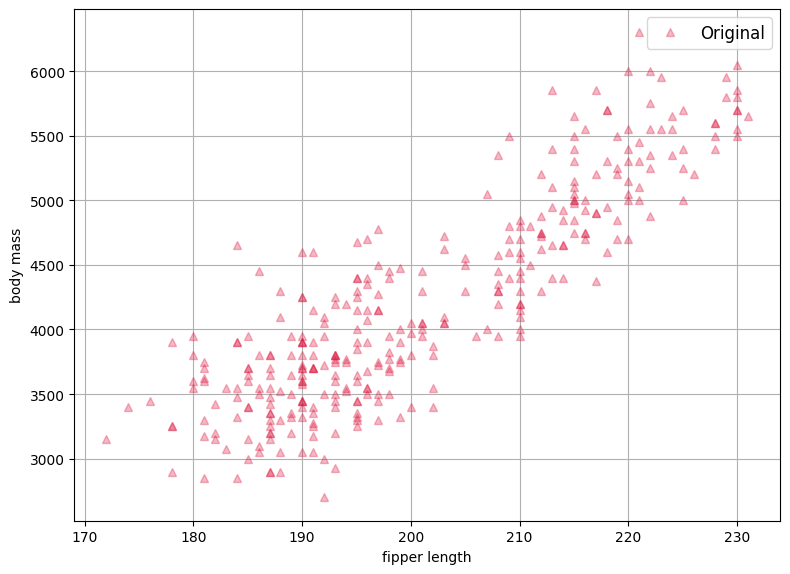

In [3]:
def plot_pca(X, Xp=None, title=''):

    fig, ax = plt.subplots(figsize=(8, 6))

    X = np.array(X)
    ax.plot(X[:,0], X[:,1], "^", c='crimson', alpha=0.3, label='Original')

    if Xp is not None:
        Xp = np.array(Xp)
        ax.plot(Xp[:,0], Xp[:,1], "o", c='navy', alpha=0.3, label='Transformed')

    ax.set(xlabel='fipper length', ylabel='body mass')
    ax.legend(fontsize=12)
    ax.grid()
    fig.suptitle(title, fontsize=14)
    fig.tight_layout()

plot_pca(x)

### Scaling

PCA는 feature들의 상대적인 분산을 이용하므로 scaling이 필수이다. 어떤 scaling 방법이 적합한지 설명한다.

In [4]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(x)

분산이 scale에 영향받기 때문에 표준화하여 평균0, 분산1이 되도록 scale하는 것이 좋다.

In [5]:
def rotate_x(X, theta):

    """
    rotate the rows of X by the given angle

    X     : n x k array
    theta : Radians angle

    Xp    : n x k array
    """

    R = np.array( [[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    Xp = np.matmul(X, R)
    return Xp

## principal component 찾기

### rotation matrix
다음 rotation matrix은 행렬 x의 각 행을 $\theta$ 만큼 회전시킨다.

$$R = \begin{bmatrix} \cos \theta & - \sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}$$

행렬 x의 회전은 다음과 같이 적용할 수 있다.

$$Xp = X \cdot R$$

PCA에 해당하는 최적 회전각은 다음과 같이 결정된다.

$$\theta^* = \arg \max_\theta \text{Var}\big(X\cdot R(\theta)\big)$$

### Principal component에 해당하는 angle 계산

분산이 가장 큰 회전각을 grid search로 찾아본다.

특별히 언급하지 않는한 대부분의 삼각함수 연산에는 radian을 사용한다. 그림에선 각도로 변환하여 표시한다.

$$\text{degree} = \text{radian} \times \frac{180}{\pi}$$

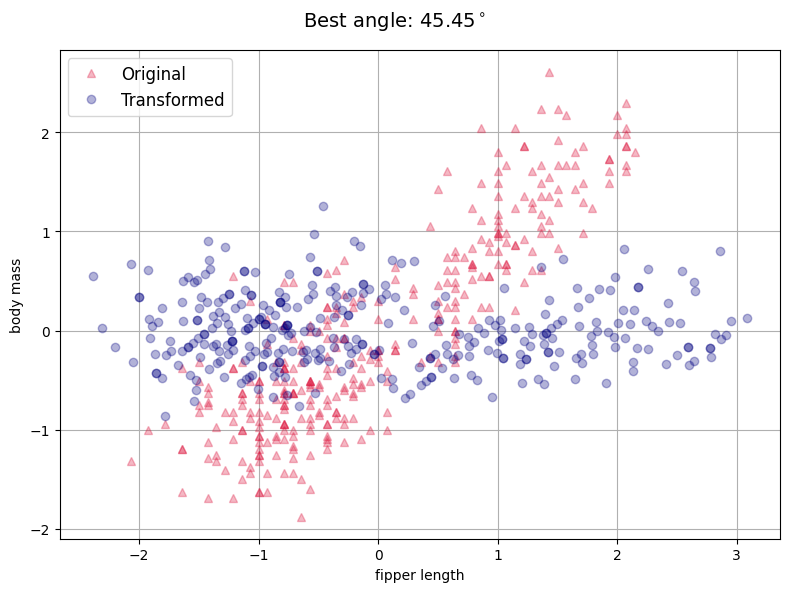

In [6]:
thetas = np.linspace(0, np.pi/2, 100) # Angles for rotation
var_a1 = [] # First component variances

for theta in thetas:
    Xp = rotate_x(X, theta)
    var = np.var(Xp, axis = 0)
    var_a1.append(var[0])

angle = thetas[np.argmax(var_a1)]
angle_degree = angle * 180 / np.pi # converting to degrees

Xp = rotate_x(X, angle)

degree = r'$^\circ$'
title = f'Best angle: {angle_degree:.2f}{degree}'

plot_pca(X, Xp, title=title)

## Sklearn의 PCA algorithm과 비교

components_ndarray of shape (n_components, n_features)
첫번째 principal componnent, $v$의 방향을 구해 그 비율을 구하면 벡터의 각도를 구할 수 있다.

$$\theta = \arctan \left( \frac{v_2}{v_1} \right), \quad v=(v_1, v_2)$$

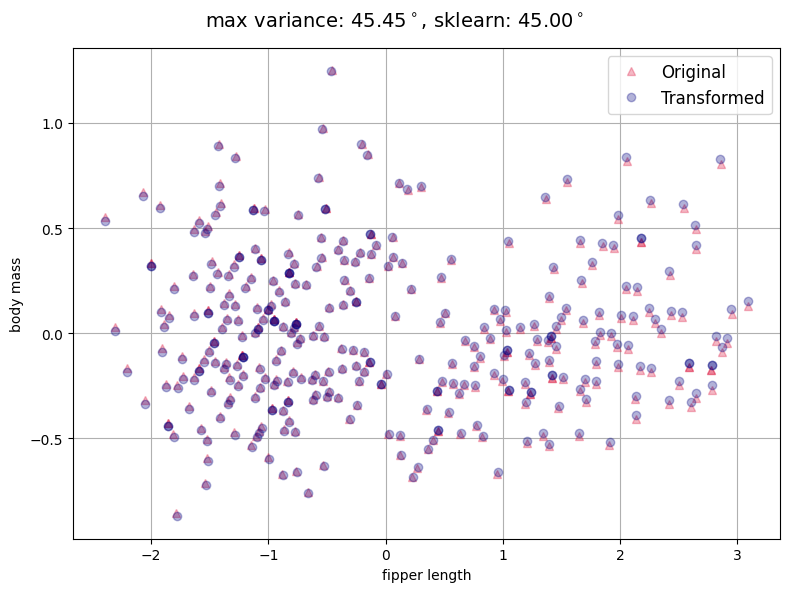

In [7]:
from sklearn.decomposition import PCA

pca = PCA(2).fit(X)
components = pca.components_
angle_sklearn = np.arctan(components[0][1] / components[0][0])
angle_sklearn_degree = angle_sklearn * 180 / np.pi

title = f'max variance: {angle_degree:.2f}{degree}, sklearn: {angle_sklearn_degree:.2f}{degree}'
plot_pca(Xp, pca.transform(X), title=title)